In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 41.7 MB/s eta 0:00:00


In [3]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import easyocr


from google.colab.patches import *

In [8]:
input_image_folder="/content/drive/MyDrive/google_colab_datasets/input_image/ANPR/*.png"
input_anotation_folder="/content/drive/MyDrive/google_colab_datasets/input_image/ANPR/*.xml"
output_folder="/content/drive/MyDrive/google_colab_datasets/output/ANPR_images/"

sample_input="/content/drive/MyDrive/google_colab_datasets/input_image/ANPR/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpeg"

In [6]:
def view_image(file):
  idx=0
  for path in glob.glob(file):
    basename=os.path.basename(path)
    idx+=1
    print(idx,basename)
    img=cv2.imread(path)
    cv2_imshow(img)
    if(idx==3): break

In [ ]:
view_image(input_image_folder)

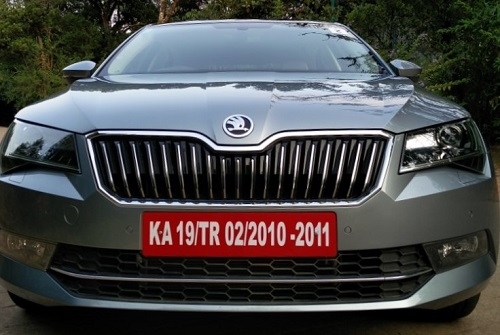

In [12]:
img=cv2.imread(sample_input)
cv2_imshow(img)

In [9]:
reader=easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [10]:
output=reader.readtext(sample_input)
print(output)

[([[143, 215], [337, 215], [337, 253], [143, 253]], 'KA 197R 0212010*2011 ', 0.14079130966689085)]


In [25]:
cordinates=output[0][0]
print(cordinates)
cordlist=list(zip(*cordinates))
print(cordlist)
print(f"\nmin-x:{min(cordlist[0])}\nmax-x:{max(cordlist[0])}\nmin-y:{min(cordlist[1])}\nmax-y:{max(cordlist[1])}")

[[143, 215], [337, 215], [337, 253], [143, 253]]
[(143, 337, 337, 143), (215, 215, 253, 253)]

min-x:143
max-x:337
min-y:215
max-y:253


In [26]:
text=output[0][1]
print(text)

KA 197R 0212010*2011 


In [21]:
x_min,y_min=[int(min(idx)) for idx in zip(*cordinates)]
x_max,y_max=[int(max(idx)) for idx in zip(*cordinates)]
print(x_min,y_min,x_max,y_max)

143 215 337 253


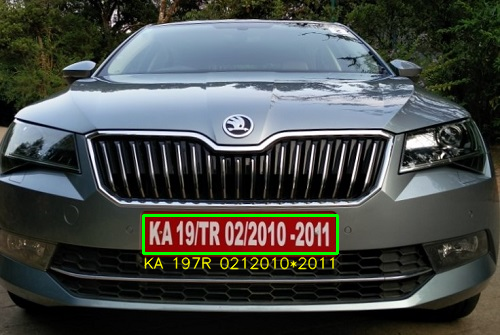

In [45]:
img=cv2.imread(sample_input)
img=cv2.putText(img,text=text,org=(x_min,y_max+15),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=(0,255,255),thickness=1,lineType=cv2.LINE_AA)
img=cv2.rectangle(img,(x_min,y_min),(x_max,y_max),(0,255,0),2)
cv2_imshow(img)